# Third cohort heatmaps

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
import plotly.express as px
import os
import pickle
import seaborn as sns
from scipy.stats import zscore



In [2]:
number_of_days = 15 #change this values based on number of days
mice = ["466029_f3", "475165_f1", "475165_f3", "475165_f5", "475165_f7"]
HD_mice = ["466029_f3", "475165_f3", "475165_f7"]
WT_mice = ["475165_f1", "475165_f5"]

## load files from folder

In [3]:
def pickle_from_folder(folder_path):
    # Initialize an empty list to store loaded data
    loaded_data = []

    # Iterate over files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is a pickle file
        if filename.endswith('.pickle'):
            file_path = os.path.join(folder_path, filename)
            try:
                # Open the pickle file in read-binary mode
                with open(file_path, 'rb') as file:
                    # Load the data from the pickle file
                    data = pickle.load(file)
                    loaded_data.append(data)
            except Exception as e:
                print(f"Error loading {filename}: {e}")
    return loaded_data

In [4]:
# Define the shared folder path
shared_path = "X:/RaymondLab/1_Kai/3_processed_data/2_pickle/stage2"
days = [f"day{i}" for i in range(1, number_of_days + 1)]

# single flash heatmaps averaged

In [5]:
def load_day_s(folder_path, day_name):
    # Load data for single and double trials
    s_v1_path = os.path.join(folder_path, "single", "v1")
    s_v1_data = pickle_from_folder(s_v1_path)

    # Calculate mean for single trials
    s_v1_means = [np.mean(data, axis=(1, 2)) for data in s_v1_data]
    #avg_s_v1 = np.mean(np.stack(s_v1_means), axis=0)
    # Filter out arrays with a shape of 330 along the relevant axis
    filtered_s_v1_means = [arr for arr in s_v1_means if arr.shape[0] != 330]
    if filtered_s_v1_means:
        avg_s_v1 = np.mean(np.stack(filtered_s_v1_means), axis=0)
    else:
        avg_s_v1 = None
        print("All arrays had a shape of 330 and were excluded.")


    #for i, arr in enumerate(s_v1_means):
    #    print(f"Shape of array {i}: {arr.shape}")

    return avg_s_v1

# single individual z-scored

normalized z scores along the rows

In [6]:
def load_one_day(file_path):

    with open(file_path, 'rb') as file:
        # Load the data from the pickle file
        data = pickle.load(file)
        time_data = np.mean(data, axis=(1, 2))
    
    return time_data

In [7]:
one_mice = []
for mouse in mice:
    one_mouse = []
    one_mice.append(one_mouse)
    for day in days:
        folder_path = os.path.join(shared_path, day, "single", "v1")
        file_path = f"{folder_path}/{mouse}_stage2_{day}_single_v1.pickle"
        try:
            one_day = load_one_day(file_path)
            one_mouse.append(one_day)
        except FileNotFoundError:
            one_mouse.append(np.zeros(len(one_day)))
            print(f"File not found for mouse {mouse} on day {day}")

File not found for mouse 466029_f3 on day day6
File not found for mouse 466029_f3 on day day9
File not found for mouse 466029_f3 on day day14
File not found for mouse 466029_f3 on day day15
File not found for mouse 475165_f1 on day day6
File not found for mouse 475165_f1 on day day15
File not found for mouse 475165_f3 on day day6
File not found for mouse 475165_f3 on day day9
File not found for mouse 475165_f3 on day day10
File not found for mouse 475165_f3 on day day11
File not found for mouse 475165_f3 on day day15
File not found for mouse 475165_f5 on day day4
File not found for mouse 475165_f5 on day day9
File not found for mouse 475165_f5 on day day10
File not found for mouse 475165_f5 on day day11
File not found for mouse 475165_f5 on day day12
File not found for mouse 475165_f5 on day day15
File not found for mouse 475165_f7 on day day9
File not found for mouse 475165_f7 on day day11
File not found for mouse 475165_f7 on day day13
File not found for mouse 475165_f7 on day day14


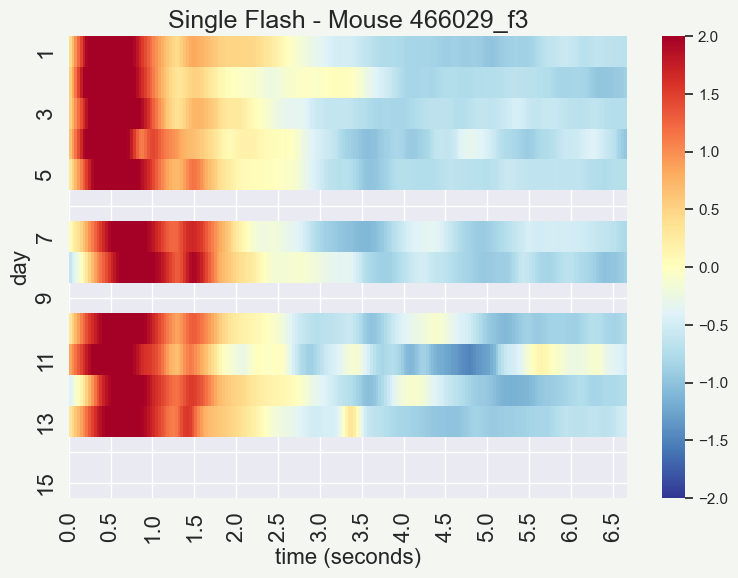

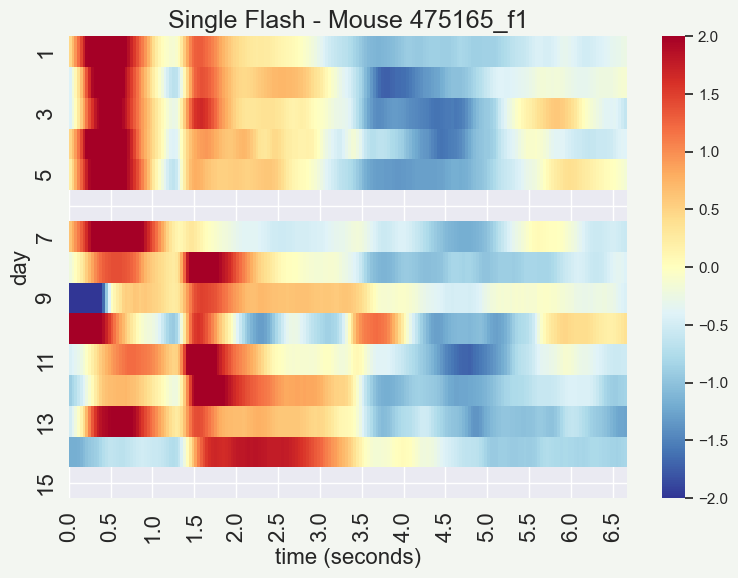

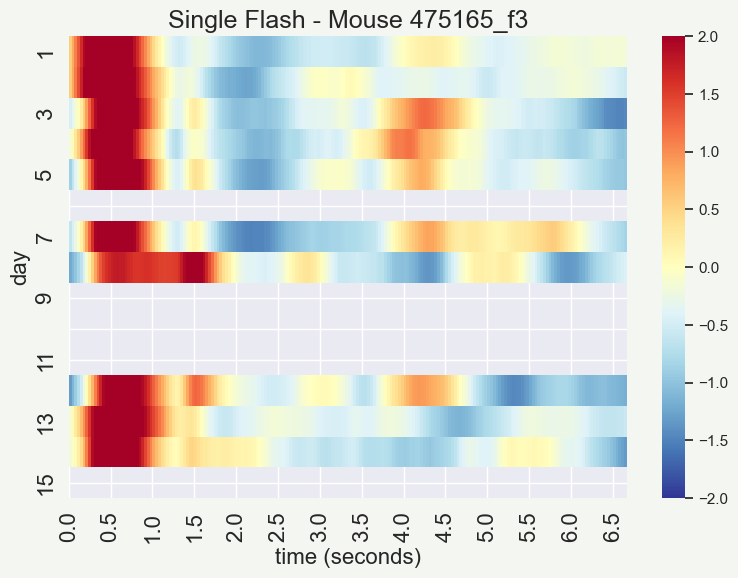

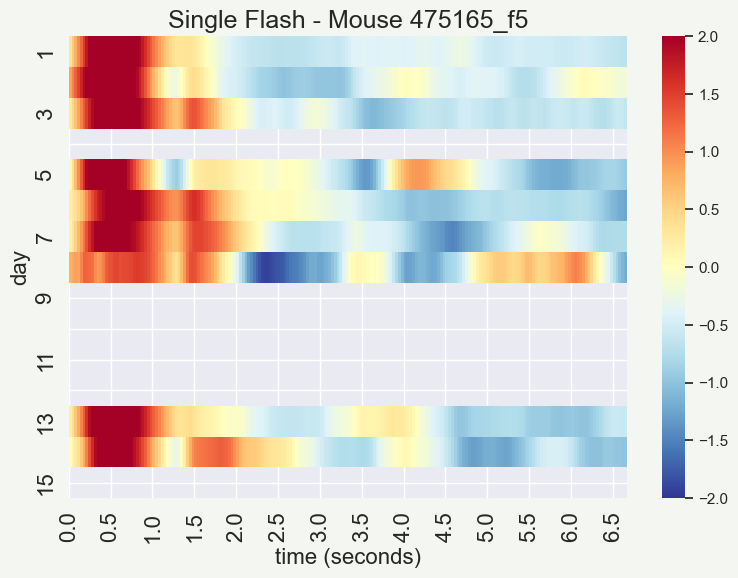

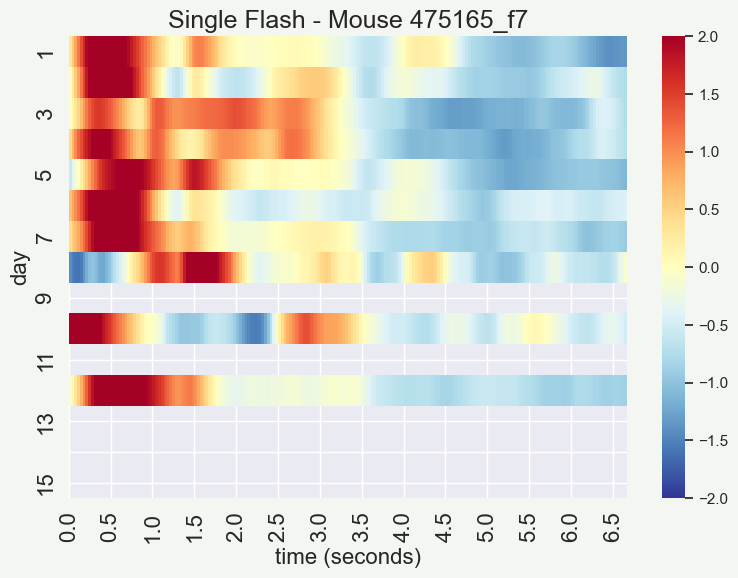

In [8]:
# Assuming 'mice' and 'one_mice' are predefined lists of data
for mouse_id, mouse_data in zip(mice, one_mice):
    # Convert mouse_data to a NumPy array if it is not already
    mouse_data = np.array(mouse_data)
    
    # Normalize data to z-scores along rows
    z_score_data_2 = zscore(mouse_data, axis=1)
    
    sns.set_theme()
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(z_score_data_2, cmap="RdYlBu_r", vmin=-2, vmax=2, ax=ax)  # Set the color scale to -2 to 2
    
    # Convert frame numbers to seconds for x-tick labels at quarter-second intervals
    num_frames = mouse_data.shape[1]
    frame_rate = 30  # 30 frames per second
    quarter_second_frames = frame_rate / 2  # 7.5 frames per quarter second
    
    x_ticks = np.arange(0, num_frames, step=quarter_second_frames)
    x_tick_labels = [str(round(i / frame_rate, 2)) for i in x_ticks]  # convert frames to seconds and round to 2 decimal places
    
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_tick_labels, fontsize=16)  # Increase font size as needed
    
    # Set y-tick labels, skipping every second day
    y_tick_labels = [str(i + 1) if (i + 1) % 2 != 0 else '' for i in range(len(mouse_data))]
    ax.set_yticklabels(y_tick_labels, fontsize=16)  # Increase font size as needed
    
    # Set x-axis label with increased font size
    ax.set_xlabel("time (seconds)", fontsize=16)
    
    # Set y-axis label with increased font size
    ax.set_ylabel("day", fontsize=16)
    
    # Set title with increased font size
    ax.set_title(f"Single Flash - Mouse {mouse_id}", fontsize=18)
    
    # Set the background color of the entire plot
    f.patch.set_facecolor('#F3F6F1')

    # Display the plot
    plt.show()


# averaged HD single

In [30]:
HD_mice = ["466029_f3", "475165_f3", "475165_f7"]
HD_one_mice = []
for mouse in HD_mice:
    HD_one_mouse = []  # List to store data for this mouse
    HD_one_mice.append(HD_one_mouse)  # Add this mouse's data list to the main list
    for day in days:
        folder_path = os.path.join(shared_path, day, "single", "v1")
        file_path = f"{folder_path}/{mouse}_stage2_{day}_single_v1.pickle"
        try:
            HD_one_day = load_one_day(file_path)  # Load the data for the day
            HD_one_mouse.append(HD_one_day)  # Append the day's data to the mouse list
        except FileNotFoundError:
            # If the file is not found, append NaN of a predefined length
            default_length = 200  # or another length depending on your dataset
            HD_one_mouse.append(np.full(default_length, np.nan))  # Append NaNs
            print(f"File not found for mouse {mouse} on day {day}")

File not found for mouse 466029_f3 on day day6
File not found for mouse 466029_f3 on day day9
File not found for mouse 466029_f3 on day day14
File not found for mouse 466029_f3 on day day15
File not found for mouse 475165_f3 on day day6
File not found for mouse 475165_f3 on day day9
File not found for mouse 475165_f3 on day day10
File not found for mouse 475165_f3 on day day11
File not found for mouse 475165_f3 on day day15
File not found for mouse 475165_f7 on day day9
File not found for mouse 475165_f7 on day day11
File not found for mouse 475165_f7 on day day13
File not found for mouse 475165_f7 on day day14
File not found for mouse 475165_f7 on day day15


C:\Users\trapped\AppData\Local\Temp\ipykernel_15408\1208194302.py:12: RuntimeWarning: Mean of empty slice
  HD_avg_zscore = np.nanmean(HD_z_score_array, axis=0)


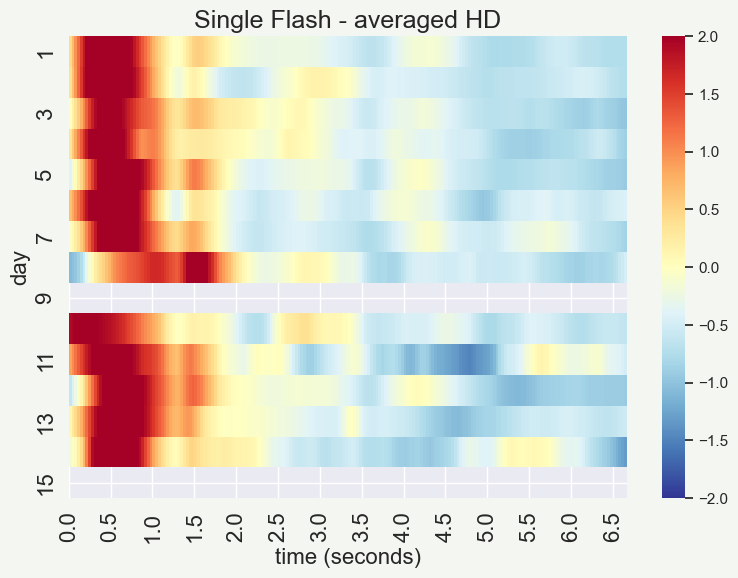

In [31]:
# Assuming 'mice' and 'one_mice' are predefined lists of data
HD_z_score_array = []
for mouse_id, mouse_data in zip(HD_mice, HD_one_mice):
    # Convert mouse_data to a NumPy array if it is not already
    mouse_data = np.array(mouse_data)
    
    # Normalize data to z-scores along rows
    HD_z_score_data_2 = zscore(mouse_data, axis=1)
    HD_z_score_array.append(HD_z_score_data_2)

# Compute the average z-score across mice
HD_avg_zscore = np.nanmean(HD_z_score_array, axis=0)

# Create the heatmap
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(HD_avg_zscore, cmap="RdYlBu_r", vmin=-2, vmax=2, ax=ax)  # Set the color scale to -2 to 2
    
# Convert frame numbers to seconds for x-tick labels at quarter-second intervals
num_frames = mouse_data.shape[1]
frame_rate = 30  # 30 frames per second
quarter_second_frames = frame_rate / 2  # 7.5 frames per quarter second
    
x_ticks = np.arange(0, num_frames, step=quarter_second_frames)
x_tick_labels = [str(round(i / frame_rate, 2)) for i in x_ticks]  # convert frames to seconds and round to 2 decimal places
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, fontsize=16)  # Increase font size as needed
    
# Set y-tick labels, skipping every second day
y_tick_labels = [str(i + 1) if (i + 1) % 2 != 0 else '' for i in range(len(mouse_data))]
ax.set_yticklabels(y_tick_labels, fontsize=16)  # Increase font size as needed
    
# Set x-axis label with increased font size
ax.set_xlabel("time (seconds)", fontsize=16)
    
# Set y-axis label with increased font size
ax.set_ylabel("day", fontsize=16)
    
# Set title with increased font size
ax.set_title(f"Single Flash - averaged HD", fontsize=18)
    
# Set the background color of the entire plot
f.patch.set_facecolor('#F3F6F1')

# Save the plot as an image (e.g., .png)
output_image_path = 'X:/RaymondLab/1_Kai/3_processed_data/4_heatmaps/SINGLE_HD_avg_heatmap.png'
plt.savefig(output_image_path, format='png', dpi=300, bbox_inches='tight')  # Save with higher resolution and adjust bounding box

# Display the plot
plt.show()


# single flash WT averaged

In [32]:
WT_one_mice = []
for mouse in WT_mice:
    WT_one_mouse = []
    WT_one_mice.append(WT_one_mouse)
    for day in days:
        folder_path = os.path.join(shared_path, day, "single", "v1")
        file_path = f"{folder_path}/{mouse}_stage2_{day}_single_v1.pickle"
        try:
            WT_one_day = load_one_day(file_path)
            WT_one_mouse.append(WT_one_day)
        except FileNotFoundError:
            WT_one_mouse.append(np.full(default_length, np.nan))  # Append NaNs
            print(f"File not found for mouse {mouse} on day {day}")

File not found for mouse 475165_f1 on day day6
File not found for mouse 475165_f1 on day day15
File not found for mouse 475165_f5 on day day4
File not found for mouse 475165_f5 on day day9
File not found for mouse 475165_f5 on day day10
File not found for mouse 475165_f5 on day day11
File not found for mouse 475165_f5 on day day12
File not found for mouse 475165_f5 on day day15


C:\Users\trapped\AppData\Local\Temp\ipykernel_15408\2168285992.py:12: RuntimeWarning: Mean of empty slice
  wt_avg_zscore = np.nanmean(wt_z_score_array, axis=0)


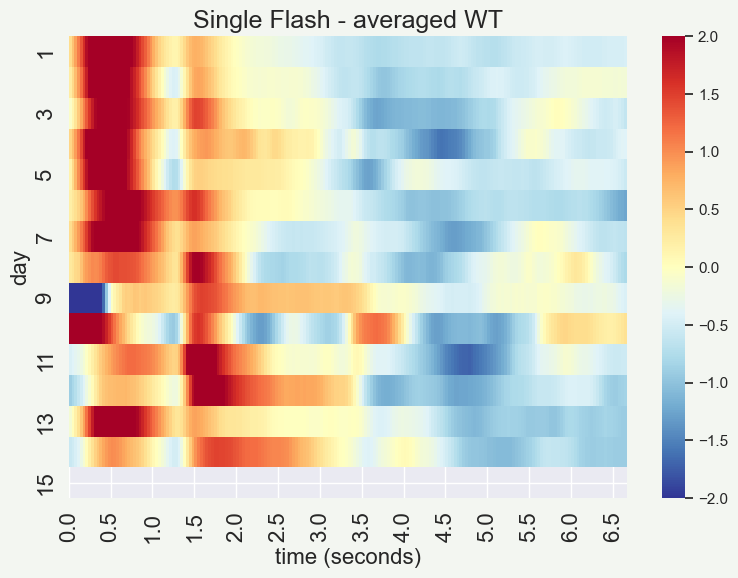

In [33]:
# Assuming 'WT_mice' and 'one_mice' are predefined lists of data
wt_z_score_array = []
for mouse_id, wt_mouse_data in zip(WT_mice, WT_one_mice):
    # Convert mouse_data to a NumPy array if it is not already
    wt_mouse_data = np.array(wt_mouse_data)
    
    # Normalize data to z-scores along rows
    wt_z_score_data_2 = zscore(wt_mouse_data, axis=1)
    wt_z_score_array.append(wt_z_score_data_2)

# Compute the average z-score across mice
wt_avg_zscore = np.nanmean(wt_z_score_array, axis=0)

# Create the heatmap
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(wt_avg_zscore, cmap="RdYlBu_r", vmin=-2, vmax=2, ax=ax)  # Set the color scale to -2 to 2
    
# Convert frame numbers to seconds for x-tick labels at quarter-second intervals
num_frames = wt_mouse_data.shape[1]
frame_rate = 30  # 30 frames per second
quarter_second_frames = frame_rate / 2  # 7.5 frames per quarter second
    
x_ticks = np.arange(0, num_frames, step=quarter_second_frames)
x_tick_labels = [str(round(i / frame_rate, 2)) for i in x_ticks]  # convert frames to seconds and round to 2 decimal places
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, fontsize=16)  # Increase font size as needed
    
# Set y-tick labels, skipping every second day
y_tick_labels = [str(i + 1) if (i + 1) % 2 != 0 else '' for i in range(len(mouse_data))]
ax.set_yticklabels(y_tick_labels, fontsize=16)  # Increase font size as needed
    
# Set x-axis label with increased font size
ax.set_xlabel("time (seconds)", fontsize=16)
    
# Set y-axis label with increased font size
ax.set_ylabel("day", fontsize=16)
    
# Set title with increased font size
ax.set_title(f"Single Flash - averaged WT", fontsize=18)
    
# Set the background color of the entire plot
f.patch.set_facecolor('#F3F6F1')

# Save the plot as an image (e.g., .png)
output_image_path = 'X:/RaymondLab/1_Kai/3_processed_data/4_heatmaps/SINGLE_WT_avg_heatmap.png'
plt.savefig(output_image_path, format='png', dpi=300, bbox_inches='tight')  # Save with higher resolution and adjust bounding box

# Display the plot
plt.show()


# double flash individual

In [13]:
d_HD_one_mice = []
for mouse in HD_mice:
    d_HD_one_mouse = []  # List to store data for this mouse
    d_HD_one_mice.append(d_HD_one_mouse)  # Add this mouse's data list to the main list
    for day in days:
        folder_path = os.path.join(shared_path, day, "double", "v1")
        file_path = f"{folder_path}/{mouse}_stage2_{day}_double_v1.pickle"
        try:
            d_HD_one_day = load_one_day(file_path)  # Load the data for the day
            d_HD_one_mouse.append(d_HD_one_day)  # Append the day's data to the mouse list
        except FileNotFoundError:
            # If the file is not found, append NaN of a predefined length
            default_length = 200  # or another length depending on your dataset
            HD_one_mouse.append(np.full(default_length, np.nan))  # Append NaNs
            print(f"File not found for mouse {mouse} on day {day}")

File not found for mouse 466029_f3 on day day6
File not found for mouse 466029_f3 on day day9
File not found for mouse 466029_f3 on day day14
File not found for mouse 466029_f3 on day day15
File not found for mouse 475165_f3 on day day6
File not found for mouse 475165_f3 on day day9
File not found for mouse 475165_f3 on day day10
File not found for mouse 475165_f3 on day day11
File not found for mouse 475165_f3 on day day15
File not found for mouse 475165_f7 on day day9
File not found for mouse 475165_f7 on day day11
File not found for mouse 475165_f7 on day day13
File not found for mouse 475165_f7 on day day14
File not found for mouse 475165_f7 on day day15


In [14]:
len(d_HD_one_mice[1])

10

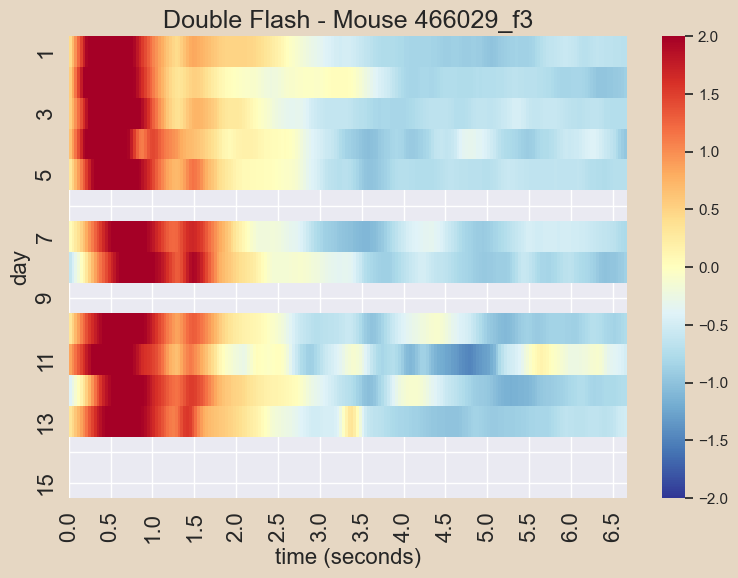

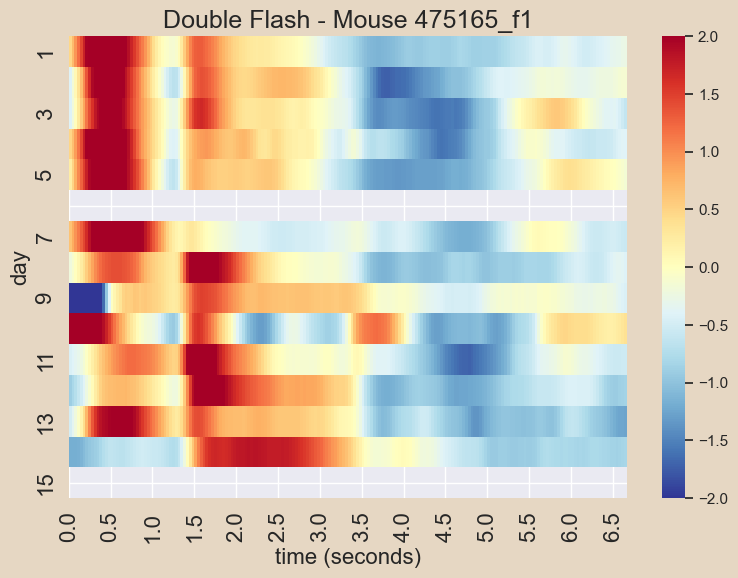

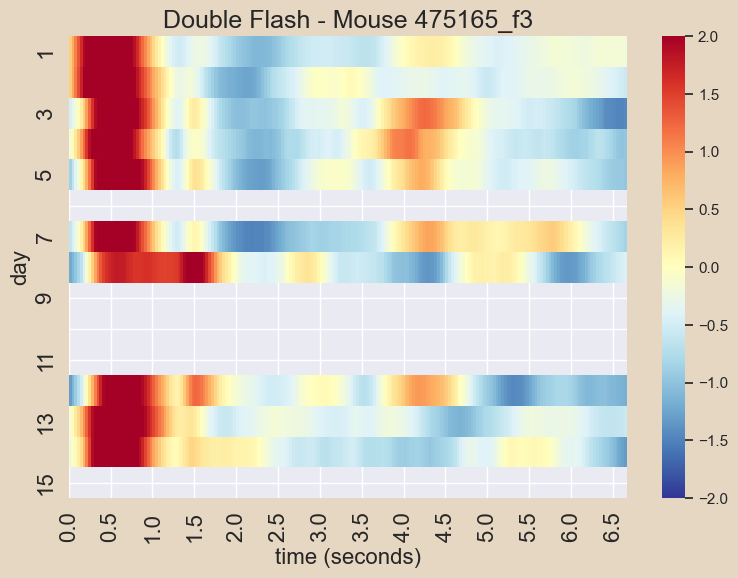

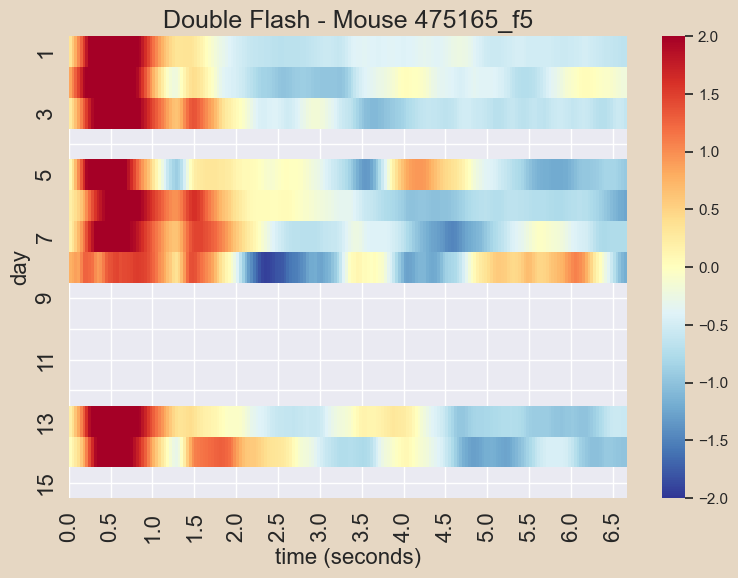

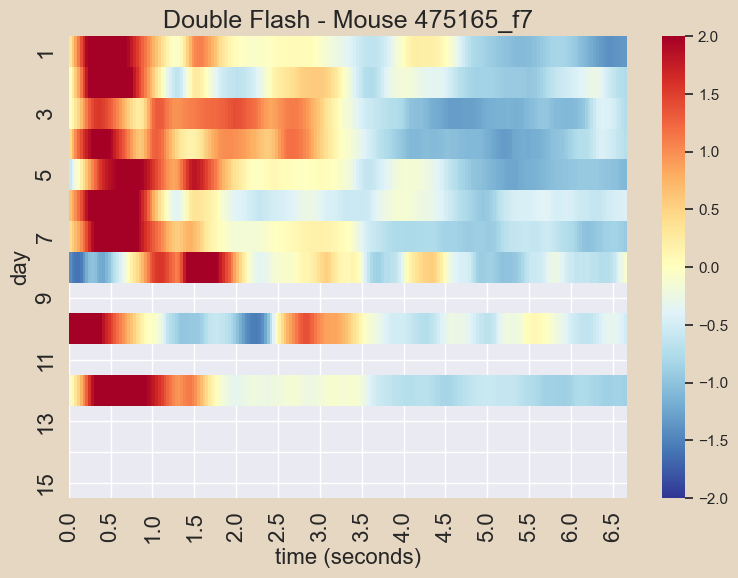

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np

# Sample data for illustration purposes
# mice = ...
# one_mice = ...

# Assuming 'mice' and 'one_mice' are predefined lists of data
for mouse_id, mouse_data in zip(mice, one_mice):
    # Convert mouse_data to a NumPy array if it is not already
    mouse_data = np.array(mouse_data)
    
    # Normalize data to z-scores along rows
    z_score_data_2 = zscore(mouse_data, axis=1)
    
    sns.set_theme()
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(z_score_data_2, cmap="RdYlBu_r", vmin=-2, vmax=2, ax=ax)  # Set the color scale to -2 to 2
    
    # Convert frame numbers to seconds for x-tick labels at quarter-second intervals
    num_frames = mouse_data.shape[1]
    frame_rate = 30  # 30 frames per second
    quarter_second_frames = frame_rate / 2  # 7.5 frames per quarter second
    
    x_ticks = np.arange(0, num_frames, step=quarter_second_frames)
    x_tick_labels = [str(round(i / frame_rate, 2)) for i in x_ticks]  # convert frames to seconds and round to 2 decimal places
    
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_tick_labels, fontsize=16)  # Increase font size as needed
    
    # Set y-tick labels, skipping every second day
    y_tick_labels = [str(i + 1) if (i + 1) % 2 != 0 else '' for i in range(len(mouse_data))]
    ax.set_yticklabels(y_tick_labels, fontsize=16)  # Increase font size as needed
    
    # Set x-axis label with increased font size
    ax.set_xlabel("time (seconds)", fontsize=16)
    
    # Set y-axis label with increased font size
    ax.set_ylabel("day", fontsize=16)
    
    # Set title with increased font size
    ax.set_title(f"Double Flash - Mouse {mouse_id}", fontsize=18)
    
    # Set the background color of the entire plot
    f.patch.set_facecolor('#E6D7C3')

    # Display the plot
    plt.show()


# double averaged HD

In [34]:
dHD_one_mice = []
for mouse in HD_mice:
    dHD_one_mouse = []  # List to store data for this mouse
    dHD_one_mice.append(dHD_one_mouse)  # Add this mouse's data list to the main list
    for day in days:
        folder_path = os.path.join(shared_path, day, "double", "v1")
        file_path = f"{folder_path}/{mouse}_stage2_{day}_double_v1.pickle"
        try:
            dHD_one_day = load_one_day(file_path)  # Load the data for the day
            dHD_one_mouse.append(dHD_one_day)  # Append the day's data to the mouse list
        except FileNotFoundError:
            # If the file is not found, append NaN of a predefined length
            default_length = 200  # or another length depending on your dataset
            dHD_one_mouse.append(np.full(default_length, np.nan))  # Append NaNs
            print(f"File not found for mouse {mouse} on day {day}")

File not found for mouse 466029_f3 on day day6
File not found for mouse 466029_f3 on day day9
File not found for mouse 466029_f3 on day day14
File not found for mouse 466029_f3 on day day15
File not found for mouse 475165_f3 on day day6
File not found for mouse 475165_f3 on day day9
File not found for mouse 475165_f3 on day day10
File not found for mouse 475165_f3 on day day11
File not found for mouse 475165_f3 on day day15
File not found for mouse 475165_f7 on day day9
File not found for mouse 475165_f7 on day day11
File not found for mouse 475165_f7 on day day13
File not found for mouse 475165_f7 on day day14
File not found for mouse 475165_f7 on day day15


C:\Users\trapped\AppData\Local\Temp\ipykernel_15408\4098630376.py:12: RuntimeWarning: Mean of empty slice
  dHD_avg_zscore = np.nanmean(dHD_z_score_array, axis=0)


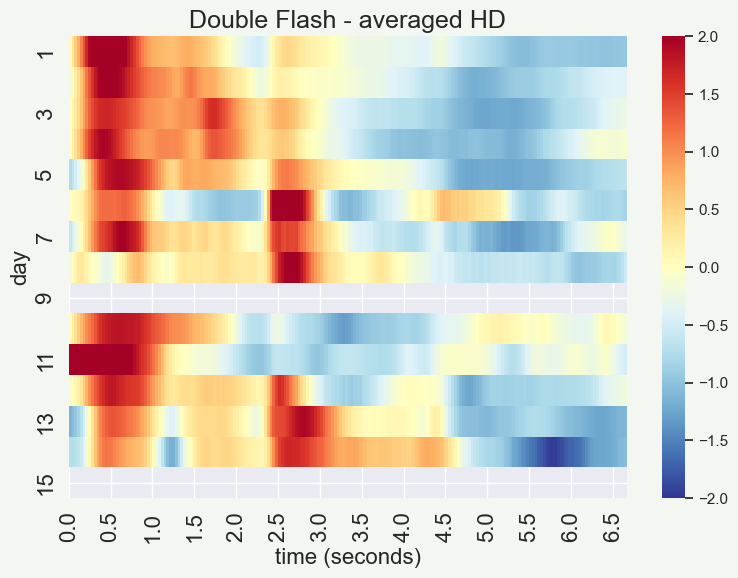

In [35]:
# Assuming 'mice' and 'one_mice' are predefined lists of data
dHD_z_score_array = []
for mouse_id, dHD_mouse_data in zip(HD_mice, dHD_one_mice):
    # Convert mouse_data to a NumPy array if it is not already
    dHD_mouse_data = np.array(dHD_mouse_data)
    
    # Normalize data to z-scores along rows
    dHD_z_score_data_2 = zscore(dHD_mouse_data, axis=1)
    dHD_z_score_array.append(dHD_z_score_data_2)

# Compute the average z-score across mice
dHD_avg_zscore = np.nanmean(dHD_z_score_array, axis=0)

# Create the heatmap
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dHD_avg_zscore, cmap="RdYlBu_r", vmin=-2, vmax=2, ax=ax)  # Set the color scale to -2 to 2
    
# Convert frame numbers to seconds for x-tick labels at quarter-second intervals
num_frames = d_HD_mouse_data.shape[1]
frame_rate = 30  # 30 frames per second
quarter_second_frames = frame_rate / 2  # 7.5 frames per quarter second
    
x_ticks = np.arange(0, num_frames, step=quarter_second_frames)
x_tick_labels = [str(round(i / frame_rate, 2)) for i in x_ticks]  # convert frames to seconds and round to 2 decimal places
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, fontsize=16)  # Increase font size as needed
    
# Set y-tick labels, skipping every second day
y_tick_labels = [str(i + 1) if (i + 1) % 2 != 0 else '' for i in range(len(mouse_data))]
ax.set_yticklabels(y_tick_labels, fontsize=16)  # Increase font size as needed
    
# Set x-axis label with increased font size
ax.set_xlabel("time (seconds)", fontsize=16)
    
# Set y-axis label with increased font size
ax.set_ylabel("day", fontsize=16)
    
# Set title with increased font size
ax.set_title(f"Double Flash - averaged HD", fontsize=18)
    
# Set the background color of the entire plot
f.patch.set_facecolor('#F3F6F1')

# Save the plot as an image (e.g., .png)
output_image_path = 'X:/RaymondLab/1_Kai/3_processed_data/4_heatmaps/DOUBLE_HD_avg_heatmap.png'
plt.savefig(output_image_path, format='png', dpi=300, bbox_inches='tight')  # Save with higher resolution and adjust bounding box

# Display the plot
plt.show()


# double averaged WT

In [36]:
dWT_one_mice = []
for mouse in WT_mice:
    dWT_one_mouse = []  # List to store data for this mouse
    dWT_one_mice.append(dWT_one_mouse)  # Add this mouse's data list to the main list
    for day in days:
        folder_path = os.path.join(shared_path, day, "double", "v1")
        file_path = f"{folder_path}/{mouse}_stage2_{day}_double_v1.pickle"
        try:
            dWT_one_day = load_one_day(file_path)  # Load the data for the day
            dWT_one_mouse.append(dWT_one_day)  # Append the day's data to the mouse list
        except FileNotFoundError:
            # If the file is not found, append NaN of a predefined length
            default_length = 200  # or another length depending on your dataset
            dWT_one_mouse.append(np.full(default_length, np.nan))  # Append NaNs
            print(f"File not found for mouse {mouse} on day {day}")

File not found for mouse 475165_f1 on day day6
File not found for mouse 475165_f1 on day day15
File not found for mouse 475165_f5 on day day4
File not found for mouse 475165_f5 on day day9
File not found for mouse 475165_f5 on day day10
File not found for mouse 475165_f5 on day day11
File not found for mouse 475165_f5 on day day12
File not found for mouse 475165_f5 on day day15


C:\Users\trapped\AppData\Local\Temp\ipykernel_15408\886552821.py:12: RuntimeWarning: Mean of empty slice
  dWT_avg_zscore = np.nanmean(dWT_z_score_array, axis=0)


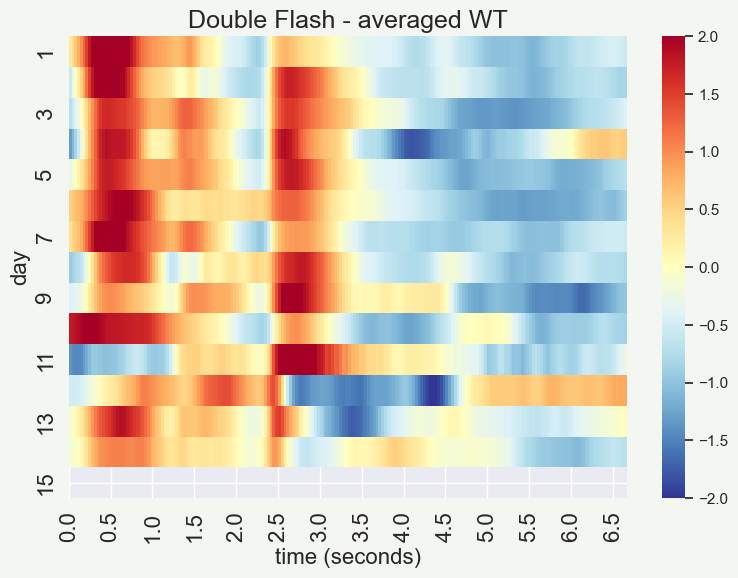

In [39]:
# Assuming 'mice' and 'one_mice' are predefined lists of data
dWT_z_score_array = []
for mouse_id, dWT_mouse_data in zip(WT_mice, dWT_one_mice):
    # Convert mouse_data to a NumPy array if it is not already
    dWT_mouse_data = np.array(dWT_mouse_data)
    
    # Normalize data to z-scores along rows
    dWT_z_score_data_2 = zscore(dWT_mouse_data, axis=1)
    dWT_z_score_array.append(dWT_z_score_data_2)

# Compute the average z-score across mice
dWT_avg_zscore = np.nanmean(dWT_z_score_array, axis=0)

# Create the heatmap
sns.set_theme()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(dWT_avg_zscore, cmap="RdYlBu_r", vmin=-2, vmax=2, ax=ax)  # Set the color scale to -2 to 2
    
# Convert frame numbers to seconds for x-tick labels at quarter-second intervals
num_frames = dWT_mouse_data.shape[1]
frame_rate = 30  # 30 frames per second
quarter_second_frames = frame_rate / 2  # 7.5 frames per quarter second
    
x_ticks = np.arange(0, num_frames, step=quarter_second_frames)
x_tick_labels = [str(round(i / frame_rate, 2)) for i in x_ticks]  # convert frames to seconds and round to 2 decimal places
    
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, fontsize=16)  # Increase font size as needed
    
# Set y-tick labels, skipping every second day
y_tick_labels = [str(i + 1) if (i + 1) % 2 != 0 else '' for i in range(len(mouse_data))]
ax.set_yticklabels(y_tick_labels, fontsize=16)  # Increase font size as needed
    
# Set x-axis label with increased font size
ax.set_xlabel("time (seconds)", fontsize=16)
    
# Set y-axis label with increased font size
ax.set_ylabel("day", fontsize=16)
    
# Set title with increased font size
ax.set_title(f"Double Flash - averaged WT", fontsize=18)
    
# Set the background color of the entire plot
f.patch.set_facecolor('#F3F6F1')

# Save the plot as an image (e.g., .png)
output_image_path = 'X:/RaymondLab/1_Kai/3_processed_data/4_heatmaps/DOUBLE_WT_avg_heatmap.png'
plt.savefig(output_image_path, format='png', dpi=300, bbox_inches='tight')  # Save with higher resolution and adjust bounding box

# Display the plot
plt.show()


# Panels

In [ ]:
#load in mask
from preprocessing_functions import (load_masks)
masking = load_masks()
mask, mask_outline = masking[0], masking[1]
rescaled_image = cv2.resize(mask, (114, 114))
binary_mask = np.where(rescaled_image == 0, np.nan, 1)

In [ ]:
#function to load in pickle files
def load_one_day_full(file_path):

    with open(file_path, 'rb') as file:
        # Load the data from the pickle file
        data = pickle.load(file)
        #time_data = np.mean(data, axis=(1, 2))
    
    return data

# panels iterated over all mice, each day

In [ ]:
one_mice_full = []

# Loop through each mouse
for mouse in mice:
    one_mouse_full = []
    one_mice_full.append(one_mouse_full)
    
    # Loop through each day
    for day in days:
        folder_path_full = os.path.join(shared_path, day, "single", "full_frame")
        file_path_full = f"{folder_path_full}/{mouse}_stage2_{day}_single_ff.pickle"
        
        try:
            one_day_full = load_one_day_full(file_path_full)
            z_score_one_day_full = zscore(one_day_full, axis=1)
            one_mouse_full.append((z_score_one_day_full, mouse, day))  # Store z-score data along with mouse and day
        except FileNotFoundError:
            one_mouse_full.append((np.zeros(len(one_day_full)), mouse, day))  # Store zeros along with mouse and day
            print(f"File not found for mouse {mouse} on day {day}")

In [ ]:
frames_to_plot = [1, 8, 15, 22, 30, 38, 45, 52, 60]
frames_to_seconds = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

for one_mouse_data in one_mice_full:
    for one_day_full, mouse, day in one_mouse_data[:]:  # Exclude the first element which is empty
        print(f"mouse {mouse} on day {day}")
        if len(one_day_full.shape) == 3:  # Check if it's a 3D array
            cropped_z_score_single_full = one_day_full[:, :-14, 7:-7]
            masked_z_score_single_full = cropped_z_score_single_full * binary_mask

            # Create a figure and subplots
            fig, axes = plt.subplots(1, 9, figsize=(20, 10))

            # Plot the specific frames
            for i, ax in enumerate(axes.flatten()):
                if i < len(frames_to_plot):
                    frame_index = frames_to_plot[i]
                    image = masked_z_score_single_full[frame_index]
                    ax.imshow(image, cmap='RdYlBu_r')
                    fig.set_facecolor('#5D6D7D')  # Set background color to black
                    ax.axis('off')
                    ax.set_title(f'{frames_to_seconds[i]} s', color='white', fontsize=40)
                else:
                    ax.axis('off')  # Hide the axes for unused subplots

            plt.tight_layout()
            plt.show()

# single panel selection

In [ ]:
#single panel
daye = "day11"

folder_path_full = os.path.join(shared_path, daye, "single", "full_frame")
file_path_full = f"{folder_path_full}/475164_f3_stage2_{daye}_single_ff.pickle"
one_day_full = load_one_day_full(file_path_full)
z_score_data_3 = zscore(one_day_full, axis=1)

# Create a figure and subplots
fig, axes = plt.subplots(1, 9, figsize=(20, 10))

# Plot the specific frames
for i, ax in enumerate(axes.flatten()):
    if i < len(frames_to_plot):
        frame_index = frames_to_plot[i]
        image = masked_z_score_single_full[frame_index]
        ax.imshow(image, cmap='RdYlBu')
        fig.set_facecolor('grey')  # Set background color to black
        ax.axis('off')
        ax.set_title(f'{frames_to_seconds[i]} s', color='black', fontsize=50)
    else:
        ax.axis('off')  # Hide the axes for unused subplots

plt.tight_layout()
plt.show()

In [ ]:
--

In [ ]:
# Create a figure and subplots from 1 to 50 frames
#fig, axes = plt.subplots(5, 10, figsize=(20, 10))

# Plot the first 50 images
#for i, ax in enumerate(axes.flatten()):
#    ax.imshow(cropped_image[i], cmap='jet')
#    ax.axis('off')
#    ax.set_title(f'Image {i+1}')
#
#plt.tight_layout()
#plt.show()

# double individual

In [ ]:
one_mice = []
for mouse in mice:
    one_mouse = []
    one_mice.append(one_mouse)
    for day in days:
        folder_path = os.path.join(shared_path, day, "double", "v1")
        file_path = f"{folder_path}/{mouse}_stage2_{day}_double_v1.pickle"
        try:
            one_day = load_one_day(file_path)
            one_mouse.append(one_day)
        except FileNotFoundError:
            one_mouse.append(np.zeros(len(one_day)))
            print(f"File not found for mouse {mouse} on day {day}")

In [ ]:
for mouse_id, mouse_data in zip(mice, one_mice):
    sns.set_theme()
    f, ax = plt.subplots(figsize=(9, 6))
    sns.heatmap(mouse_data, cmap="jet")
    ax.set_yticklabels([str(i) for i in range(1, len(mouse_data) + 1)])
    ax.set(xlabel="frames (30fps)", ylabel="day", title=f"Double Flash - Mouse {mouse_id}")

    # Display the plot
    plt.show()